In [31]:
import sqlite3

import pandas as pd
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [4]:
cnx = sqlite3.connect("../db.sqlite3")
df = pd.read_sql_query(f"""
SELECT a.*, b.*, c.* FROM restaurant_order as a JOIN restaurant_orderitem as b on a.id = b.order_id JOIN restaurant_product as c on c.id = b.product_id
""", cnx)
cnx.close()
df

,id,datetime,id,quantity,order_id,product_id,id,price,name
0,1,2019-08-03 20:25:00,1,2,1,6,6,0.80,Plain Papadum
1,1,2019-08-03 20:25:00,2,1,1,240,240,12.95,King Prawn Balti
2,1,2019-08-03 20:25:00,3,1,1,19,19,2.95,Garlic Naan
3,1,2019-08-03 20:25:00,4,1,1,36,36,3.95,Mushroom Rice
4,1,2019-08-03 20:25:00,5,1,1,111,111,8.95,Paneer Tikka Masala
...,...,...,...,...,...,...,...,...,...
74813,3255,2016-05-18 18:53:00,74814,2,3255,247,247,17.95,House Red wine 75cl
74814,12905,2016-05-14 19:28:00,74815,2,12905,247,247,17.95,House Red wine 75cl
74815,3272,2016-05-10 13:18:00,74816,2,3272,247,247,17.95,House Red wine 75cl
74816,11404,2016-04-07 19:04:00,74817,1,11404,248,248,17.95,House white wine 75cl


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

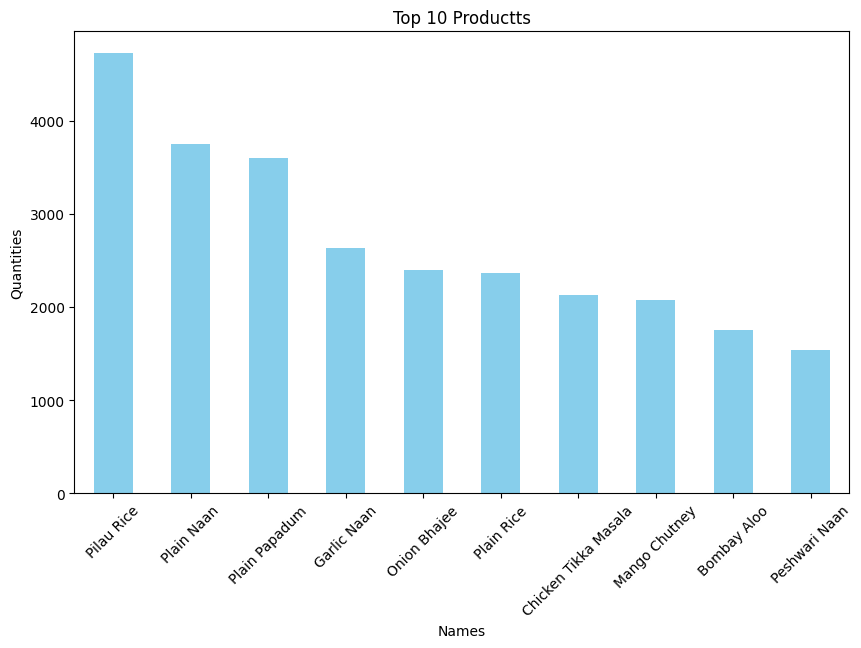

In [34]:
# unique_sorted_names = df["name"].unique()
# sorted_unique_names = sorted(unique_sorted_names, reverse=True)[:10]
# sorted_unique_names
products_top_10 = df["name"].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
products_top_10.plot(kind="bar", color="skyblue")
plt.title("Top 10 Productts")
plt.xlabel("Names")
plt.ylabel("Quantities")
plt.xticks(rotation=45)
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

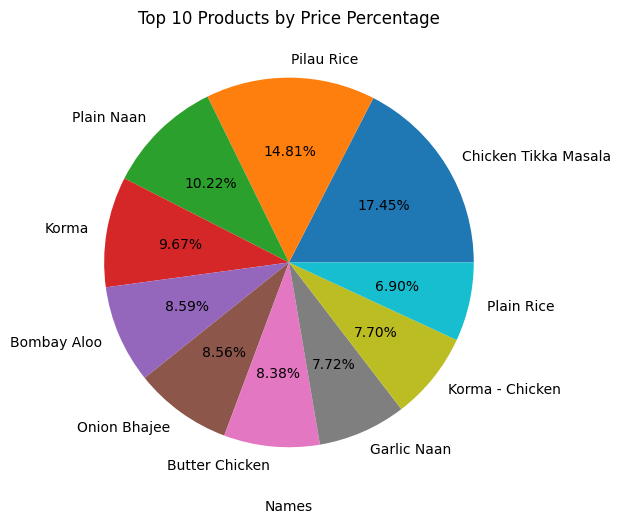

In [63]:
df["Item Price"] = df["quantity"] * df["price"]
total_price = df.groupby("name")["Item Price"].sum()
top_10 = total_price.nlargest(10)
top_10_percentage = (top_10 / total_price.sum()) * 100
plt.figure(figsize=(10, 6))
top_10_percentage.plot(kind="pie", autopct="%.2f%%")
plt.title("Top 10 Products by Price Percentage")
plt.xlabel("Names")
# plt.ylabel("Percentage of Total Price (%)")
plt.ylabel("")
plt.xticks(rotation=45)
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

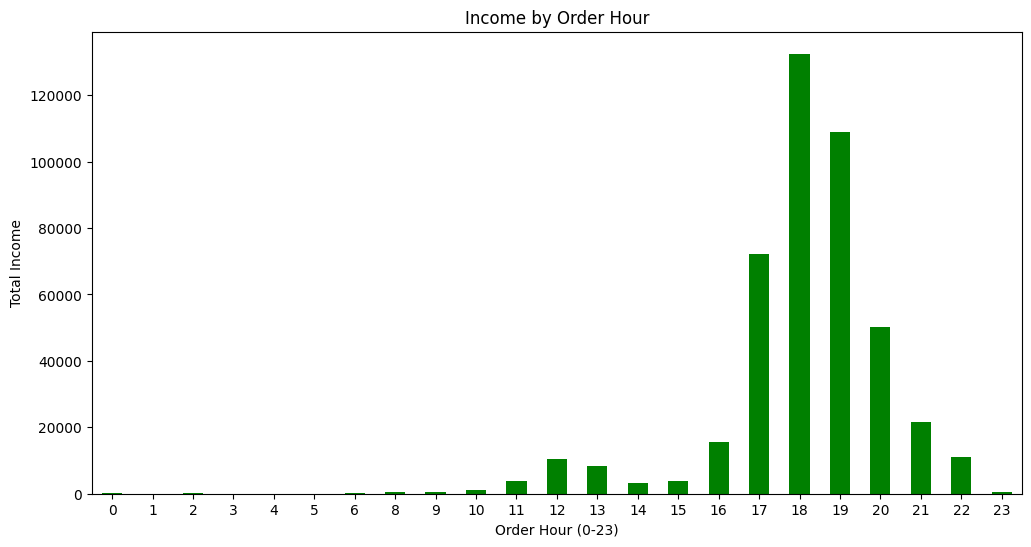

In [58]:
df["Order Datetime"] = pd.to_datetime(df["datetime"])
df["Order Hour"] = df["Order Datetime"].dt.hour
hourly_income = df.groupby("Order Hour")["Item Price"].sum()


plt.figure(figsize=(12, 6))
hourly_income.plot(kind="bar", color="green")
plt.title("Income by Order Hour")
plt.xlabel("Order Hour (0-23)")
plt.ylabel("Total Income")
plt.xticks(rotation=0)
plt.show()


# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

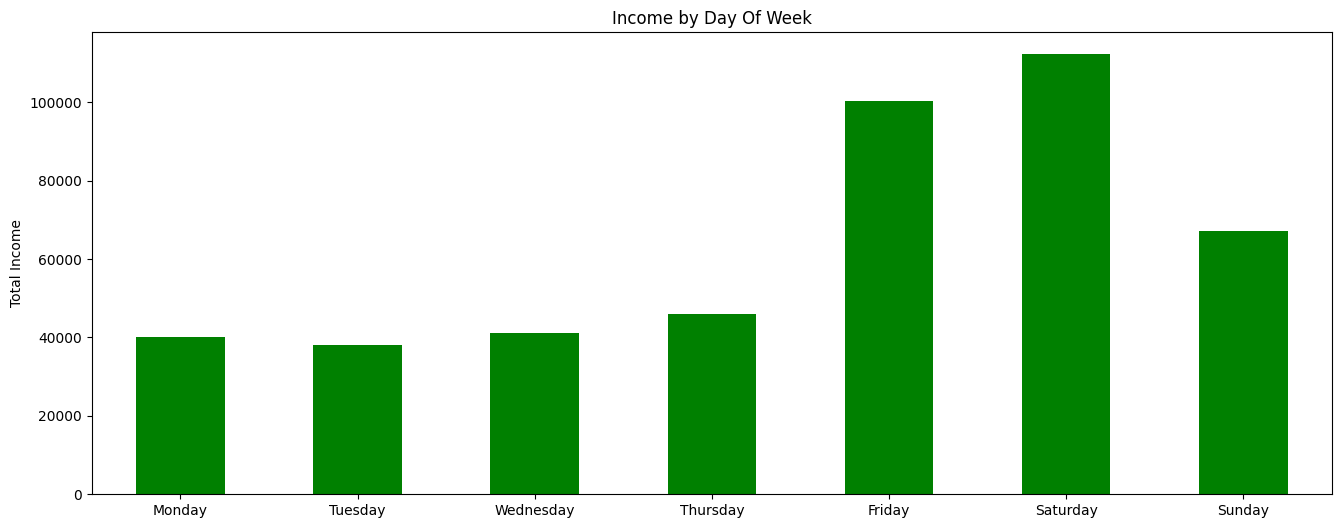

In [79]:
df["Order Day Of The Week"] = df["Order Datetime"].dt.day_name()
day_of_week_income = df.groupby("Order Day Of The Week")["Item Price"].sum()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_of_week_income = day_of_week_income.reindex(day_order)
plt.figure(figsize=(16, 6))
day_of_week_income.plot(kind="bar", color="green")
plt.title("Income by Day Of Week")
# plt.xlabel("Week day")
plt.xlabel("")
plt.ylabel("Total Income")
plt.xticks(rotation=0)
plt.show()